# MID TEST FGA-MACHINE LEARNING UMM
Disini saya akan mengimplementasikan salah satu metode klasifikasi dari dataset iris, data tersebut dapat anda download disini: https://tinyurl.com/fga-iris 

**Oleh**
Adwin Nugruho S

In [0]:
#import semua library yang akan digunakan
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import scipy.optimize as opt
import pylab as pl
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
from sklearn.model_selection import train_test_split

In [4]:
#download dataset yang akan diklasifikasi dengan perintah dibawah
!wget -O iris.csv https://tinyurl.com/fga-iris #iris.csv adalah nama file yang akan tersimpan

--2019-10-18 13:29:01--  https://tinyurl.com/fga-iris
Resolving tinyurl.com (tinyurl.com)... 104.20.219.42, 104.20.218.42, 2606:4700:10::6814:da2a, ...
Connecting to tinyurl.com (tinyurl.com)|104.20.219.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://datahub.io/machine-learning/iris/r/iris.csv [following]
--2019-10-18 13:29:01--  https://datahub.io/machine-learning/iris/r/iris.csv
Resolving datahub.io (datahub.io)... 104.24.112.103, 104.24.113.103, 2606:4700:30::6818:7167, ...
Connecting to datahub.io (datahub.io)|104.24.112.103|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/machine-learning/iris/iris_csv/data/8bce8766530bf404228ea3fc026dfee3/iris_csv.csv [following]
--2019-10-18 13:29:01--  https://pkgstore.datahub.io/machine-learning/iris/iris_csv/data/8bce8766530bf404228ea3fc026dfee3/iris_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 104.24.112.103, 104.

In [0]:
#panggil dataset yang telah di download, disini saya menginisialisasi dengan nama iris.csv
dataset_iris = pd.read_csv('/content/iris.csv')

In [6]:
#lihat data dengan perintah berikut
dataset_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#lihat info data dengan detail dengan perintah berikut
dataset_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Dari data diatas dapat dilihat terdapat 150 entri data dengan total 5 kolom serta tipe data float dan 1 bertipe data object

In [8]:
#deskripsikan data untuk melihat informasi seperti berapa rata-ratanya dengan perintah
dataset_iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
dataset_iris[['petallength','sepallength','sepalwidth','petalwidth']].mean()

petallength    3.758667
sepallength    5.843333
sepalwidth     3.054000
petalwidth     1.198667
dtype: float64

# 1. Visualisasi data

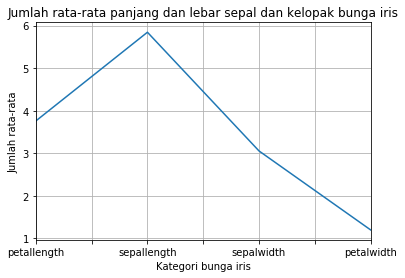

In [22]:
rata_iris = dataset_iris[['petallength','sepallength','sepalwidth','petalwidth']].mean()
rata_iris.plot()
plt.xlabel("Kategori bunga iris")
plt.ylabel("Jumlah rata-rata")
plt.title("Jumlah rata-rata panjang dan lebar sepal dan kelopak bunga iris")
plt.grid()
plt.show()

# 2. Pembagian data

In [23]:
#x untuk angkanya
x = dataset_iris[['petallength','sepallength','sepalwidth','petalwidth']].values
x[0:5]

array([[1.4, 5.1, 3.5, 0.2],
       [1.4, 4.9, 3. , 0.2],
       [1.3, 4.7, 3.2, 0.2],
       [1.5, 4.6, 3.1, 0.2],
       [1.4, 5. , 3.6, 0.2]])

In [33]:
#y untuk pengkategoriannya berdasarkan kelasnya dan ubah y ke numeric
y = dataset_iris[['class']]
kategori = preprocessing.LabelEncoder()
kategori.fit(["Iris-setosa","Iris-versicolor","Iris-virginica"])
#0 untuk kategori setosa
#1 untuk kategori versicolor
#2 untuk kategori virginica
y = kategori.transform(y)
y[0:10]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
#sebelum dijadikan training dan test x di normalisasi
normx = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print(normx)

[[-1.34127240e+00 -9.00681170e-01  1.03205722e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.14301691e+00 -1.24957601e-01 -1.31297673e+00]
 [-1.39813811e+00 -1.38535265e+00  3.37848329e-01 -1.31297673e+00]
 [-1.28440670e+00 -1.50652052e+00  1.06445364e-01 -1.31297673e+00]
 [-1.34127240e+00 -1.02184904e+00  1.26346019e+00 -1.31297673e+00]
 [-1.17067529e+00 -5.37177559e-01  1.95766909e+00 -1.05003079e+00]
 [-1.34127240e+00 -1.50652052e+00  8.00654259e-01 -1.18150376e+00]
 [-1.28440670e+00 -1.02184904e+00  8.00654259e-01 -1.31297673e+00]
 [-1.34127240e+00 -1.74885626e+00 -3.56360566e-01 -1.31297673e+00]
 [-1.28440670e+00 -1.14301691e+00  1.06445364e-01 -1.44444970e+00]
 [-1.28440670e+00 -5.37177559e-01  1.49486315e+00 -1.31297673e+00]
 [-1.22754100e+00 -1.26418478e+00  8.00654259e-01 -1.31297673e+00]
 [-1.34127240e+00 -1.26418478e+00 -1.24957601e-01 -1.44444970e+00]
 [-1.51186952e+00 -1.87002413e+00 -1.24957601e-01 -1.44444970e+00]
 [-1.45500381e+00 -5.25060772e-02  2.18907205e+00 -1.31297673e

In [35]:
#jadikan training dan test disini menggunakan 80:20, 80 untuk training dan sisanya 20 untuk test
xtrain, xtest, ytrain, ytest = train_test_split(normx, y, test_size = 0.2, random_state = 4)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)
#fungsi .shape adalah untuk melihat dimensi data

(120, 4) (120,)
(30, 4) (30,)


In [36]:
#disini klasifikasi menggunakan metode SVM
from sklearn import svm
klasifikasi = svm.SVC(kernel='linear')
klasifikasi.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
#proses prediksi klasifikasi
ypredict = klasifikasi.predict(xtest)
ypredict[0:5]
#menampilkan 5 data teratas

array([2, 0, 2, 2, 2])

# Evaluasi hasil

In [0]:
#membuat confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.75      0.60      0.67         5
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.85      0.83      0.84        30
weighted avg       0.90      0.90      0.90        30

Confusion matrix, without normalization
[[16  0]
 [ 0  3]]


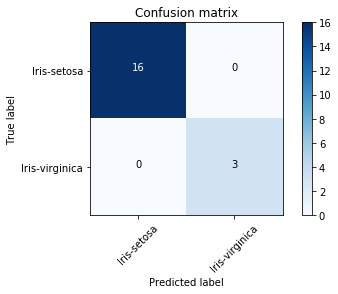

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(ytest, ypredict, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(ytest, ypredict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Iris-setosa','Iris-virginica'],normalize= False,  title='Confusion matrix')

In [41]:
from sklearn.metrics import f1_score
f1_score(ytest, ypredict, average='weighted')
#f1 skor untuk melihat hasil akurasi klasifikasi 

0.8970760233918128

In [42]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(ytest, ypredict)
#dan ini untuk melihat skor kemiripan

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9